In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def simulate_random_walks(start, num_walks, num_steps, step_size):
    steps = np.random.choice([-step_size, step_size], size=(num_walks, num_steps))
    walks = np.sum(steps, axis=1)
    endpoints = walks + start
    return endpoints


def monte_carlo_heat_kernel(endpoints, start, end, epsilon, num_walks):
    numerator = np.sum((endpoints >= end - epsilon) & (endpoints <= end + epsilon))
    denominator = num_walks * epsilon * 2
    return numerator / denominator


def analytical_heat_kernel(start, end, t):
    return 1 / np.sqrt(4 * np.pi * t) * np.exp(-((end - start) ** 2) / (4 * t))


def varadhan_formula(kernel_estimate, t):
    #if kernel_estimate <= 0:
    #    return np.nan
    estimated_distance = np.sqrt(np.abs(-4 * t * np.log(kernel_estimate)))
    return estimated_distance


t = 1e-6
num_walks = 1_000_000
num_steps = 500
step_size = np.sqrt(2 * t / num_steps)
epsilon = step_size
start = 0
end = step_size * 78


endpoints = simulate_random_walks(start, num_walks, num_steps, step_size)
monte_carlo = monte_carlo_heat_kernel(endpoints, start, end, epsilon, num_walks)
analytical = analytical_heat_kernel(start, end, t)
varadhan_dist = varadhan_formula(monte_carlo, t)

print(f'Monte Carlo Heat Kernel Estimate: {monte_carlo}')
print(f'Analytical Heat Kernel Value:     {analytical}')
print(f'Varadhan Distance Estimate:       {varadhan_dist} vs. Real Distance: {end-start}')

Monte Carlo Heat Kernel Estimate: 0.616644143732834
Analytical Heat Kernel Value:     0.6429059425656009
Varadhan Distance Estimate:       0.0013906303231576208 vs. Real Distance: 0.004933153149862671


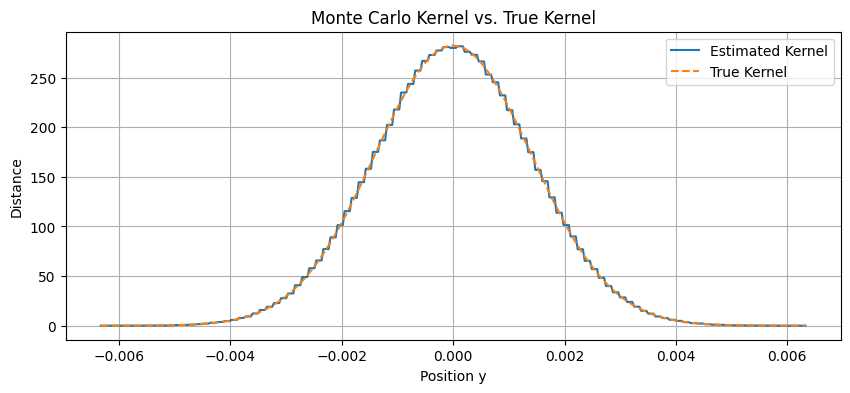

In [12]:
def get_kernel_numerical(distances):
    estimates = []
    for distance in distances:
        start = 0
        end = distance
        monte_carlo = monte_carlo_heat_kernel(endpoints, start, end, epsilon, num_walks)
        estimates.append(monte_carlo)
    return estimates

def get_kernel_analytical(distances):
    estimates = []
    for distance in distances:
        start = 0
        end = distance
        analytical = analytical_heat_kernel(0, distance, t)
        estimates.append(analytical)
    return estimates


distances = np.linspace(-step_size * 100, step_size * 100, 400)
monte_carlo = get_kernel_numerical(distances)
analytical = get_kernel_analytical(distances)


    
plt.figure(figsize=(10, 4))
plt.plot(distances, monte_carlo, label='Estimated Kernel')
plt.plot(distances, analytical, label='True Kernel', linestyle='--')
plt.title('Monte Carlo Kernel vs. True Kernel')
plt.xlabel('Position y')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/7n/vh0z661j05vd6f34xhyt5lq00000gn/T/ipykernel_46681/843211765.py:28: RuntimeWarning: invalid value encountered in sqrt
  estimated_distances.append(np.sqrt(varadhan_estimate))


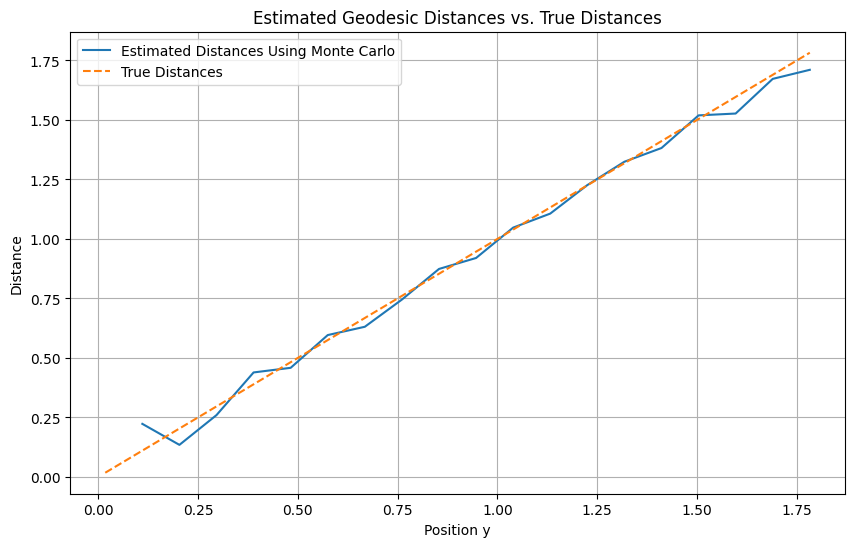

In [18]:
def estimate_distances_using_varadhans_formula(x, y, ts, num_walks, num_steps, step_size, epsilon):
    estimated_distances = []
    for t in ts:
        step_size_t = np.sqrt(2 * t) / np.sqrt(num_steps)
        endpoints = simulate_random_walks(x, num_walks, num_steps, step_size_t)
        
        kernel_value = monte_carlo_heat_kernel(endpoints, x, y, epsilon, num_walks)
        if kernel_value > 0:
            varadhan_estimate = -4 * t * np.log(kernel_value)
        else:
            varadhan_estimate = np.inf
        estimated_distances.append(np.sqrt(varadhan_estimate))
    
    return estimated_distances

x = 0  
t = ts[-1]
step_size = np.sqrt(2 * t) / np.sqrt(num_steps)
y = np.linspace(step_size, step_size * 100, 20)  
ts = np.logspace(-3, -1.1, 50) 

num_walks = 100000
num_steps = 500
step_size = 1  
epsilon = 0.1  

distances = []
for y_val in y:
    distances.append(estimate_distances_using_varadhans_formula(x, y_val, ts, num_walks, num_steps, step_size, epsilon)[-1])  # Use the smallest t

plt.figure(figsize=(10, 6))
plt.plot(y, distances, label='Estimated Distances Using Monte Carlo')
plt.plot(y, np.abs(y - x), label='True Distances', linestyle='--')
plt.title('Estimated Geodesic Distances vs. True Distances')
plt.xlabel('Position y')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()